In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
import getpass
password = getpass.getpass()

········


In [2]:
# 1.Create a query or queries to extract the information you think may be relevant...
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

query = ''' SELECT r.rental_id, r.customer_id, f.film_id, f.title, c.name AS category, f.rating, p.amount, r.rental_date, r.return_date
FROM payment AS p
JOIN rental as r
ON r.rental_id = p.rental_id
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film AS f
ON f.film_id = i.film_id
JOIN film_category AS fc
ON f.film_id = fc.film_id
JOIN category as c
ON c.category_id = fc.category_id
WHERE r.rental_date BETWEEN ('2005-01-01') AND ('2005-12-31')
GROUP BY f.title'''

data = pd.read_sql_query(query, engine)
data

,rental_id,customer_id,film_id,title,category,rating,amount,rental_date,return_date
0,10895,77,19,AMADEUS HOLY,Action,PG,0.99,2005-08-02 01:16:59,2005-08-03 02:41:59
1,207,47,21,AMERICAN CIRCUS,Action,R,4.99,2005-05-26 08:04:38,2005-05-27 09:32:38
2,1123,448,29,ANTITRUST TOMATOES,Action,NC-17,2.99,2005-05-31 16:48:43,2005-06-02 19:17:43
3,3309,463,56,BAREFOOT MANCHURIAN,Action,G,4.99,2005-06-21 08:00:49,2005-06-29 04:11:49
4,3946,13,67,BERETS AGENT,Action,PG-13,2.99,2005-07-06 21:39:24,2005-07-11 16:10:24
...,...,...,...,...,...,...,...,...,...
953,117,7,931,VALENTINE VANISHING,Travel,PG-13,0.99,2005-05-25 19:30:46,2005-05-31 23:59:46
954,1588,322,977,WINDOW SIDE,Travel,R,8.99,2005-06-16 04:53:21,2005-06-25 07:29:21
955,3148,202,981,WOLVES DESIRE,Travel,NC-17,0.99,2005-06-20 20:27:18,2005-06-24 20:30:18
956,9202,466,988,WORKER TARZAN,Travel,R,3.99,2005-07-30 12:43:24,2005-08-07 10:39:24


In [6]:
# 2. Create a query to get the total amount of rentals in June for each film.

query_1 = '''SELECT f.title, COUNT(r.rental_id) AS june_rentals FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film as f
ON i.film_id = f.film_id
WHERE rental_date BETWEEN '2005-06-01' AND '2005-06-30'
GROUP BY f.title
ORDER BY title ASC'''
data_1 = pd.read_sql_query(query_1, engine)
data_1.head()

,title,june_rentals
0,ACADEMY DINOSAUR,3
1,ADAPTATION HOLES,1
2,AFFAIR PREJUDICE,2
3,AFRICAN EGG,2
4,AGENT TRUMAN,3


In [7]:
# 3. Do the same with july
query_2 = '''SELECT f.title, COUNT(r.rental_id) AS july_rentals FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film as f
ON i.film_id = f.film_id
WHERE rental_date BETWEEN '2005-07-01' AND '2005-07-30'
GROUP BY f.title
ORDER BY title ASC'''
data_2 = pd.read_sql_query(query_2, engine)
data_2.head()

,title,july_rentals
0,ACADEMY DINOSAUR,6
1,ACE GOLDFINGER,2
2,ADAPTATION HOLES,4
3,AFFAIR PREJUDICE,9
4,AFRICAN EGG,4


In [8]:
# 4. Create a new column containing (Yes/No) for each film whether or not the number of monthly rentals 
#in July was bigger than in June. Your objective will be to predict this new column.


In [9]:
query_3 = '''SELECT COUNT(r.rental_id) AS july_rentals FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film as f
ON i.film_id = f.film_id
WHERE rental_date BETWEEN '2005-06-01' AND '2005-06-30'
GROUP BY f.title
ORDER BY f.title ASC'''

data['June_rentals'] =  pd.read_sql_query(query_3, engine)
data

,rental_id,customer_id,film_id,title,category,rating,amount,rental_date,return_date,June_rentals
0,10895,77,19,AMADEUS HOLY,Action,PG,0.99,2005-08-02 01:16:59,2005-08-03 02:41:59,3.0
1,207,47,21,AMERICAN CIRCUS,Action,R,4.99,2005-05-26 08:04:38,2005-05-27 09:32:38,1.0
2,1123,448,29,ANTITRUST TOMATOES,Action,NC-17,2.99,2005-05-31 16:48:43,2005-06-02 19:17:43,2.0
3,3309,463,56,BAREFOOT MANCHURIAN,Action,G,4.99,2005-06-21 08:00:49,2005-06-29 04:11:49,2.0
4,3946,13,67,BERETS AGENT,Action,PG-13,2.99,2005-07-06 21:39:24,2005-07-11 16:10:24,3.0
...,...,...,...,...,...,...,...,...,...,...
953,117,7,931,VALENTINE VANISHING,Travel,PG-13,0.99,2005-05-25 19:30:46,2005-05-31 23:59:46,NaN
954,1588,322,977,WINDOW SIDE,Travel,R,8.99,2005-06-16 04:53:21,2005-06-25 07:29:21,NaN
955,3148,202,981,WOLVES DESIRE,Travel,NC-17,0.99,2005-06-20 20:27:18,2005-06-24 20:30:18,NaN
956,9202,466,988,WORKER TARZAN,Travel,R,3.99,2005-07-30 12:43:24,2005-08-07 10:39:24,NaN


In [10]:
query_4 = '''SELECT COUNT(r.rental_id) AS july_rentals FROM rental AS r
JOIN inventory AS i
ON r.inventory_id = i.inventory_id
JOIN film as f
ON i.film_id = f.film_id
WHERE rental_date BETWEEN '2005-07-01' AND '2005-07-31'
GROUP BY f.title
ORDER BY f.title ASC'''

data['July_rentals'] =  pd.read_sql_query(query_4, engine)
data.head()

data = data.fillna(0)
data

,rental_id,customer_id,film_id,title,category,rating,amount,rental_date,return_date,June_rentals,July_rentals
0,10895,77,19,AMADEUS HOLY,Action,PG,0.99,2005-08-02 01:16:59,2005-08-03 02:41:59,3.0,7
1,207,47,21,AMERICAN CIRCUS,Action,R,4.99,2005-05-26 08:04:38,2005-05-27 09:32:38,1.0,2
2,1123,448,29,ANTITRUST TOMATOES,Action,NC-17,2.99,2005-05-31 16:48:43,2005-06-02 19:17:43,2.0,4
3,3309,463,56,BAREFOOT MANCHURIAN,Action,G,4.99,2005-06-21 08:00:49,2005-06-29 04:11:49,2.0,11
4,3946,13,67,BERETS AGENT,Action,PG-13,2.99,2005-07-06 21:39:24,2005-07-11 16:10:24,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...
953,117,7,931,VALENTINE VANISHING,Travel,PG-13,0.99,2005-05-25 19:30:46,2005-05-31 23:59:46,0.0,2
954,1588,322,977,WINDOW SIDE,Travel,R,8.99,2005-06-16 04:53:21,2005-06-25 07:29:21,0.0,2
955,3148,202,981,WOLVES DESIRE,Travel,NC-17,0.99,2005-06-20 20:27:18,2005-06-24 20:30:18,0.0,3
956,9202,466,988,WORKER TARZAN,Travel,R,3.99,2005-07-30 12:43:24,2005-08-07 10:39:24,0.0,6


In [11]:
def yes_no (row):
    if row['June_rentals'] < row['July_rentals']:
        return 'Yes'
    elif row['June_rentals'] > row['July_rentals']:
        return 'No'
    else:
        return 'tie'

    

data['Yes/No'] = data.apply(yes_no, axis=1)
data

,rental_id,customer_id,film_id,title,category,rating,amount,rental_date,return_date,June_rentals,July_rentals,Yes/No
0,10895,77,19,AMADEUS HOLY,Action,PG,0.99,2005-08-02 01:16:59,2005-08-03 02:41:59,3.0,7,Yes
1,207,47,21,AMERICAN CIRCUS,Action,R,4.99,2005-05-26 08:04:38,2005-05-27 09:32:38,1.0,2,Yes
2,1123,448,29,ANTITRUST TOMATOES,Action,NC-17,2.99,2005-05-31 16:48:43,2005-06-02 19:17:43,2.0,4,Yes
3,3309,463,56,BAREFOOT MANCHURIAN,Action,G,4.99,2005-06-21 08:00:49,2005-06-29 04:11:49,2.0,11,Yes
4,3946,13,67,BERETS AGENT,Action,PG-13,2.99,2005-07-06 21:39:24,2005-07-11 16:10:24,3.0,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
953,117,7,931,VALENTINE VANISHING,Travel,PG-13,0.99,2005-05-25 19:30:46,2005-05-31 23:59:46,0.0,2,Yes
954,1588,322,977,WINDOW SIDE,Travel,R,8.99,2005-06-16 04:53:21,2005-06-25 07:29:21,0.0,2,Yes
955,3148,202,981,WOLVES DESIRE,Travel,NC-17,0.99,2005-06-20 20:27:18,2005-06-24 20:30:18,0.0,3,Yes
956,9202,466,988,WORKER TARZAN,Travel,R,3.99,2005-07-30 12:43:24,2005-08-07 10:39:24,0.0,6,Yes


In [12]:
sakila = pd.DataFrame(data = data)

In [13]:
sakila

,rental_id,customer_id,film_id,title,category,rating,amount,rental_date,return_date,June_rentals,July_rentals,Yes/No
0,10895,77,19,AMADEUS HOLY,Action,PG,0.99,2005-08-02 01:16:59,2005-08-03 02:41:59,3.0,7,Yes
1,207,47,21,AMERICAN CIRCUS,Action,R,4.99,2005-05-26 08:04:38,2005-05-27 09:32:38,1.0,2,Yes
2,1123,448,29,ANTITRUST TOMATOES,Action,NC-17,2.99,2005-05-31 16:48:43,2005-06-02 19:17:43,2.0,4,Yes
3,3309,463,56,BAREFOOT MANCHURIAN,Action,G,4.99,2005-06-21 08:00:49,2005-06-29 04:11:49,2.0,11,Yes
4,3946,13,67,BERETS AGENT,Action,PG-13,2.99,2005-07-06 21:39:24,2005-07-11 16:10:24,3.0,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
953,117,7,931,VALENTINE VANISHING,Travel,PG-13,0.99,2005-05-25 19:30:46,2005-05-31 23:59:46,0.0,2,Yes
954,1588,322,977,WINDOW SIDE,Travel,R,8.99,2005-06-16 04:53:21,2005-06-25 07:29:21,0.0,2,Yes
955,3148,202,981,WOLVES DESIRE,Travel,NC-17,0.99,2005-06-20 20:27:18,2005-06-24 20:30:18,0.0,3,Yes
956,9202,466,988,WORKER TARZAN,Travel,R,3.99,2005-07-30 12:43:24,2005-08-07 10:39:24,0.0,6,Yes


In [14]:
sakila['rental_id'].value_counts()
sakila['customer_id'].value_counts()
sakila['film_id'].value_counts()
sakila['amount'].value_counts()

4.99     256
2.99     196
0.99     183
3.99      81
5.99      74
6.99      46
7.99      44
8.99      27
1.99      26
9.99      20
10.99      4
11.99      1
Name: amount, dtype: int64

In [15]:
sakila['rental_id'] = sakila['rental_id'].astype('object')
sakila['customer_id'] = sakila['customer_id'].astype('object')
sakila['film_id'] = sakila['film_id'].astype('object')

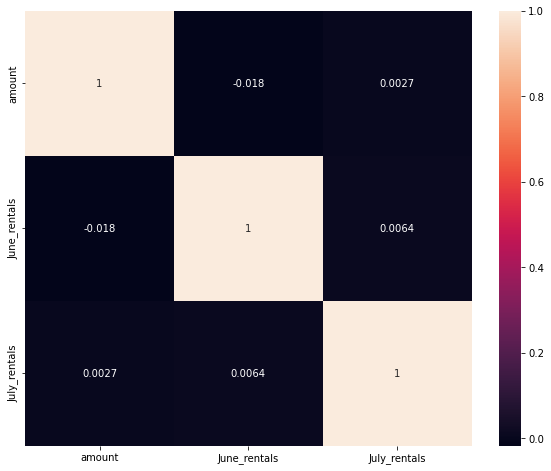

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_matrix=sakila.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
y = sakila['Yes/No']
X = sakila.drop(['Yes/No'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [19]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

In [20]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(X_train_num) 

X_train_scaled = transformer.transform(X_train_num)
X_test_scaled  = transformer.transform(X_test_num)

X_train_trans = pd.DataFrame(X_train_scaled)
X_test_trans  = pd.DataFrame(X_test_scaled)

X_train_trans.head()

,0,1,2
0,0.0,0.285714,0.200000
1,0.3,0.428571,0.400000
2,0.0,0.285714,0.133333
3,0.2,0.571429,0.333333
4,0.0,0.571429,0.466667


In [21]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = X_train.select_dtypes(include = np.object)

encoder = OneHotEncoder(drop='first') 

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()

X_train_encoded_cate = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
X_train_encoded_cate.head()

C:\Users\guill\AppData\Local\Temp\ipykernel_16556\127103925.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)


,rental_id_13,rental_id_15,rental_id_24,rental_id_30,rental_id_33,rental_id_39,rental_id_40,rental_id_44,rental_id_59,rental_id_66,...,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_train_treated = np.concatenate([X_train_scaled, X_train_encoded_cate], axis=1)
X_train_treated.shape

(766, 2749)

In [38]:
X_train_encoded_cate.shape

(766, 2746)

In [33]:
X_test_scaled = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test_num.columns)
X_test_scaled

,amount,June_rentals,July_rentals
0,0.0,0.857143,0.266667
1,0.2,0.285714,0.133333
2,0.9,0.428571,0.400000
3,0.8,0.285714,0.266667
4,0.4,0.857143,0.466667
...,...,...,...
187,0.2,0.142857,0.266667
188,0.0,0.142857,0.133333
189,0.4,0.571429,0.800000
190,0.2,0.857143,0.600000


In [24]:
X_test_categr = X_test.select_dtypes(include = np.object)


X_test_cat_encoded = encoder.fit_transform(X_test_categr).toarray()

X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())
X_test_cat_encoded.head()

C:\Users\guill\AppData\Local\Temp\ipykernel_16556\1912978093.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categr = X_test.select_dtypes(include = np.object)


,rental_id_21,rental_id_23,rental_id_104,rental_id_120,rental_id_149,rental_id_157,rental_id_229,rental_id_262,rental_id_276,rental_id_280,...,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
X_test_treated = np.concatenate([X_test_scaled, X_test_cat_encoded], axis=1)
X_test_treated.shape

(192, 757)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state = 100, solver='saga',
                  multi_class='multinomial')
lr.fit(X_train_treated, y_train)
y_test_pred = lr.predict(X_test_treated)

accuracy_score(y_test, y_test_pred)

ValueError: X has 757 features, but LogisticRegression is expecting 2749 features as input.